In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pysrc.services.data_service import load_site_data
from pysrc.optimization import gurobi
import pandas as pd

import pathlib 

num_sites=78


In [2]:
(
    zbar_2017,
    gamma,
    z_2017,
    forestArea_2017_ha,
    theta,
    _,
    _,
    _,
    _,
) = load_site_data(num_sites)

# Computing carbon absorbed in start period
x0_vals = gamma * forestArea_2017_ha

(
    sol_val_X,
    sol_val_Up,
    sol_val_Um,
    sol_val_Z,
    sol_val_Ua,
) = gurobi.solve_planner_problem(
    T=200,
    theta=theta,
    gamma=gamma,
    x0=x0_vals,
    zbar=zbar_2017,
    z0=z_2017,
    pe=6.5,
    pa=42.03,
)

Data successfully loaded from /Users/ph2696/Projects/project-amazon/data/hmc
Solving the optimization problem...
Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-30
Read LP format model from file /var/folders/d1/k6sr3htd7fdgk614mmq8pwq00000gr/T/tmp25mcfrpt.pyomo.lp
Reading time = 0.15 seconds
x1: 62800 rows, 125201 columns, 312166 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 62800 rows, 125201 columns and 312166 nonzeros
Model fingerprint: 0x534fee7c
Model has 400 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [4e-05, 1e+03]
  QObjective range [6e+01, 2e+05]
  Bounds range     [3e-04, 1e+00]
  RHS range        [6e-07, 7e+00]
Presolve removed 31202 rows and 31204 columns
Presolve time: 0.04s
Presolved: 31598 rows, 93997 columns, 187515 nonzeros
Preso

In [3]:
z_2017 = z_2017.reshape(num_sites, 1)

z_det=sol_val_Z
cumulative_det_z = np.cumsum(z_det, axis=1) + z_2017
cumulative_det_z = np.hstack((z_2017, cumulative_det_z))
pct_z_det = np.sum(cumulative_det_z, axis=0) / (np.sum(zbar_2017)) * 100
time = range(200)

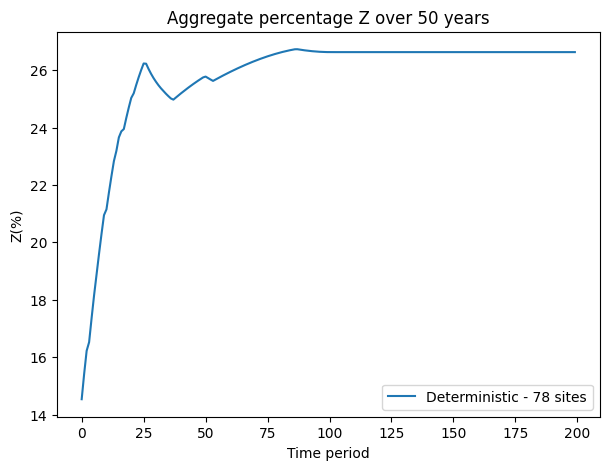

In [4]:
fig, axes = plt.subplots(1, 1, figsize = (7,5))

plt.plot(time, pct_z_det[:len(time)], label=f"Deterministic - {num_sites} sites")

plt.xlabel('Time period')
plt.ylabel('Z(%)')
plt.title('Aggregate percentage Z over 50 years')
plt.grid(False)

# Display the legend
plt.legend()

plt.show()

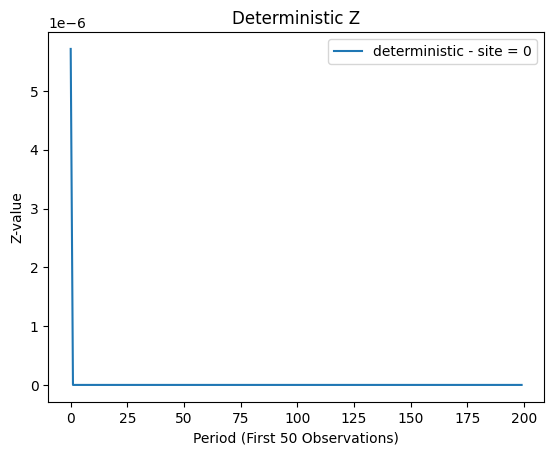

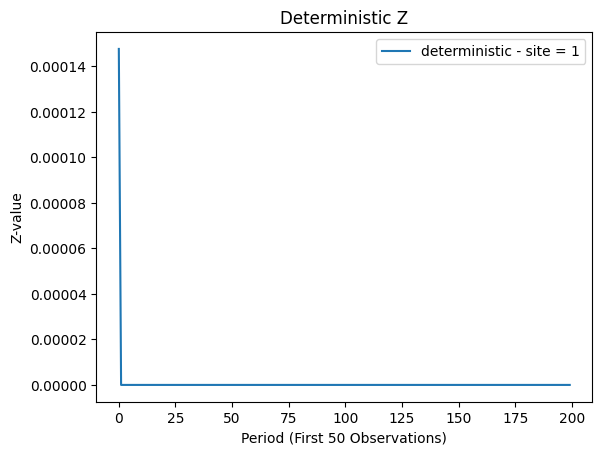

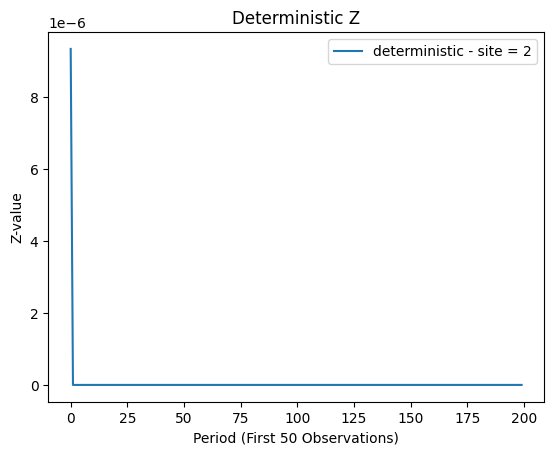

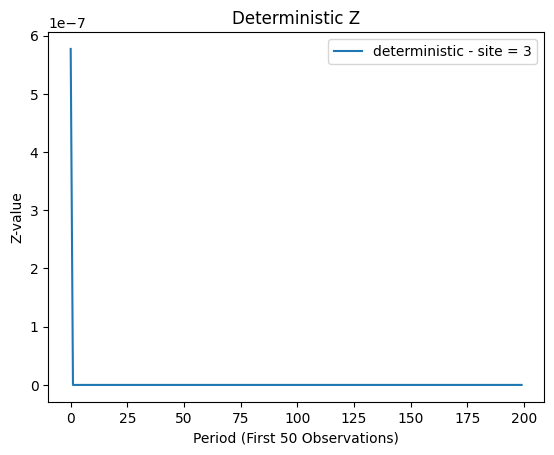

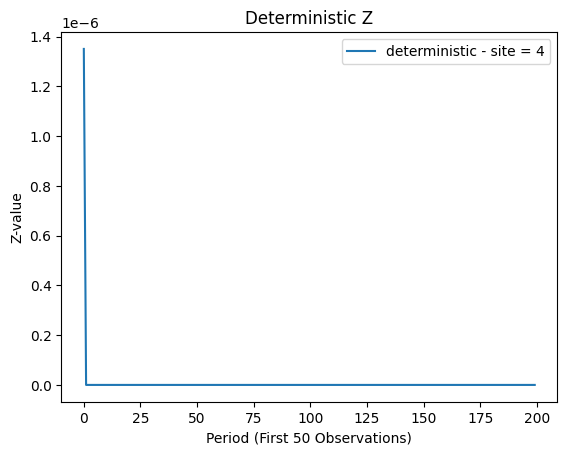

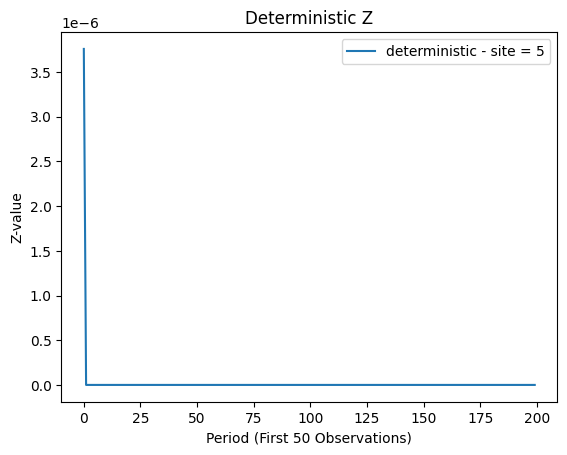

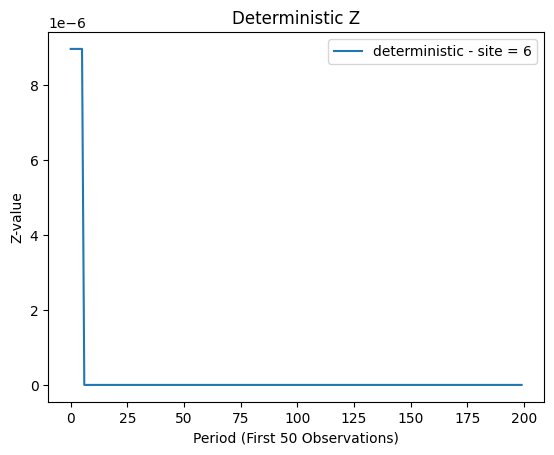

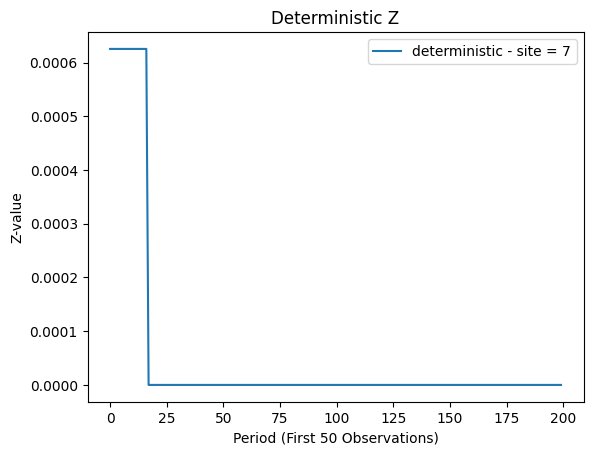

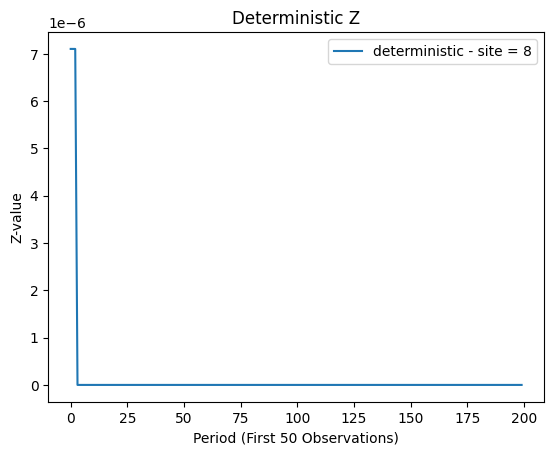

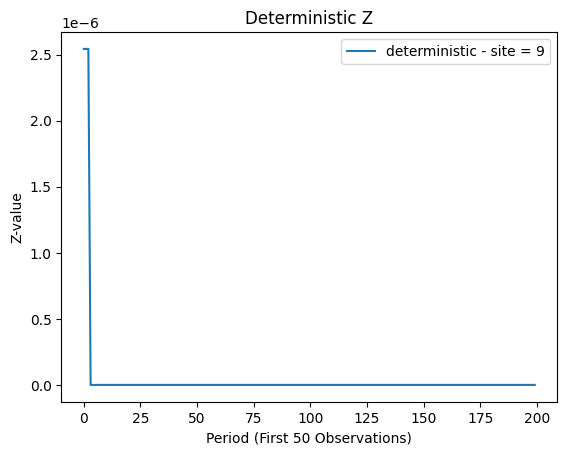

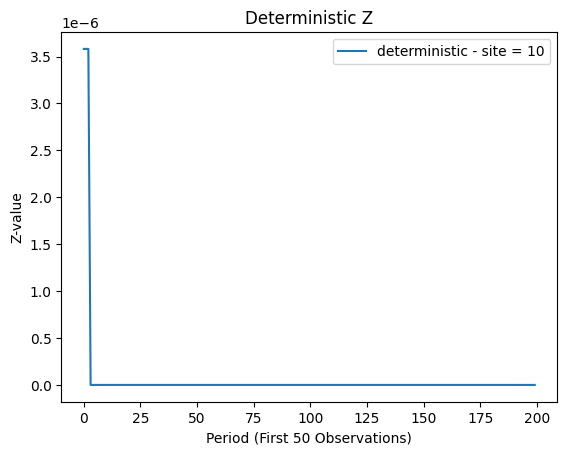

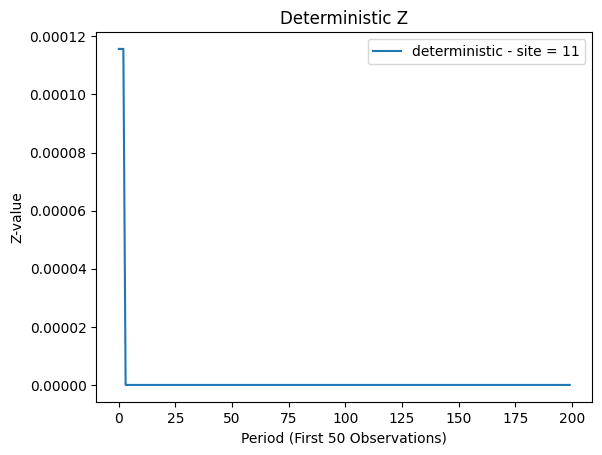

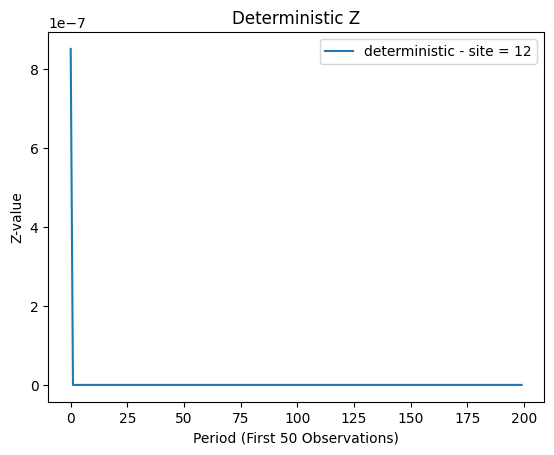

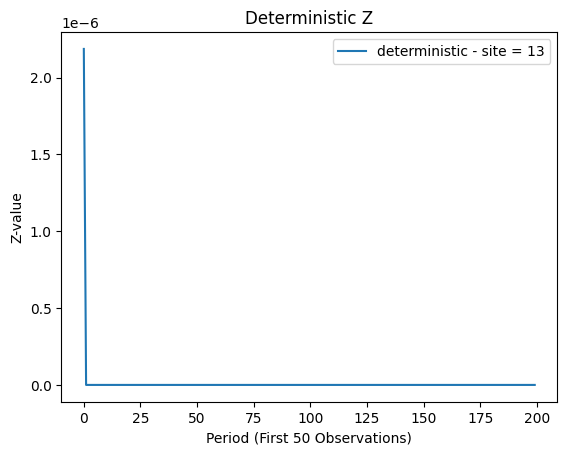

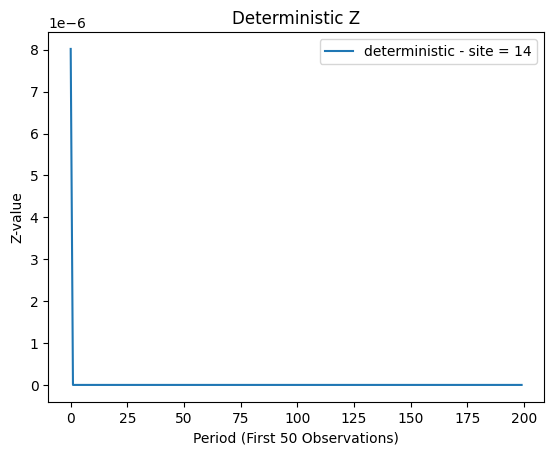

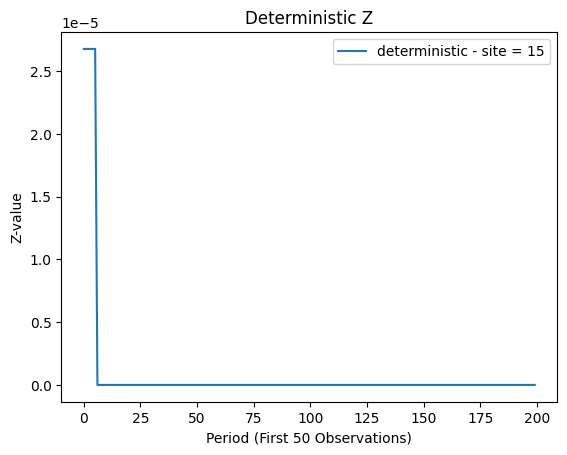

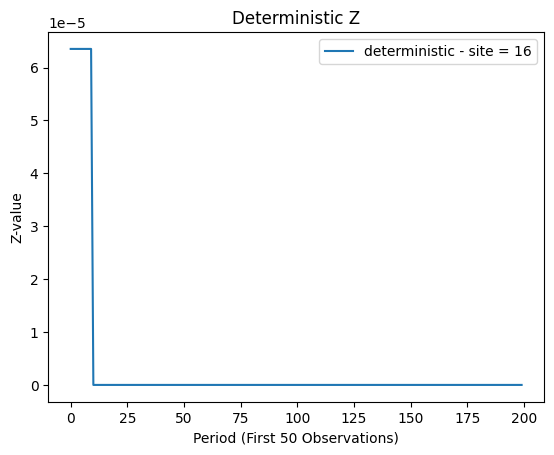

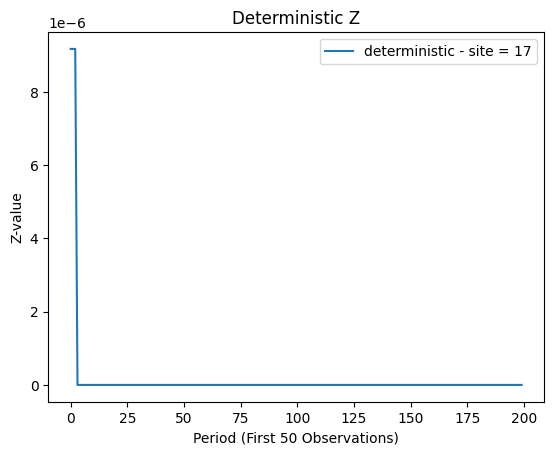

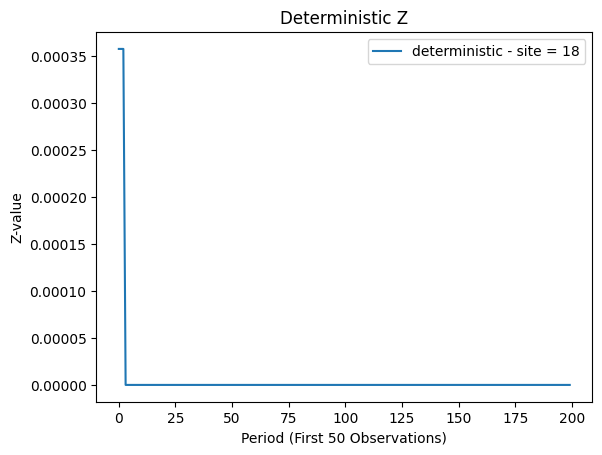

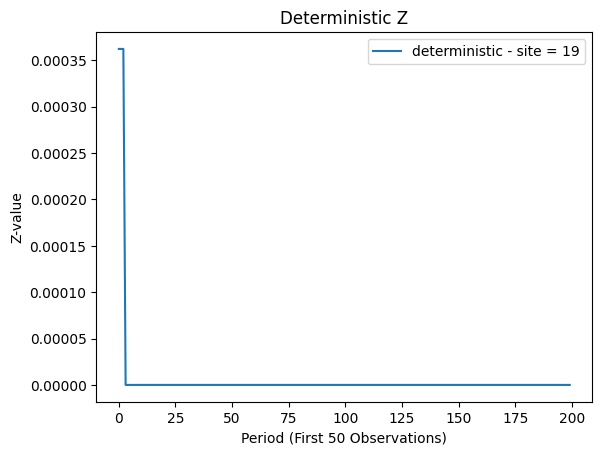

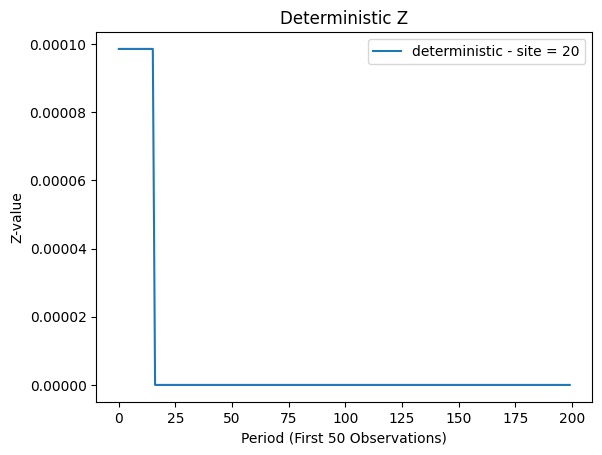

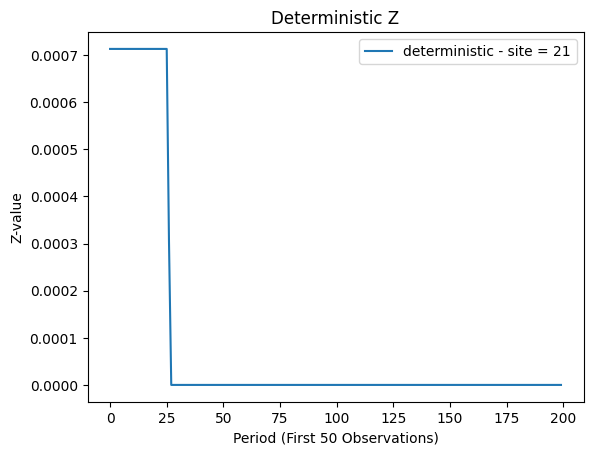

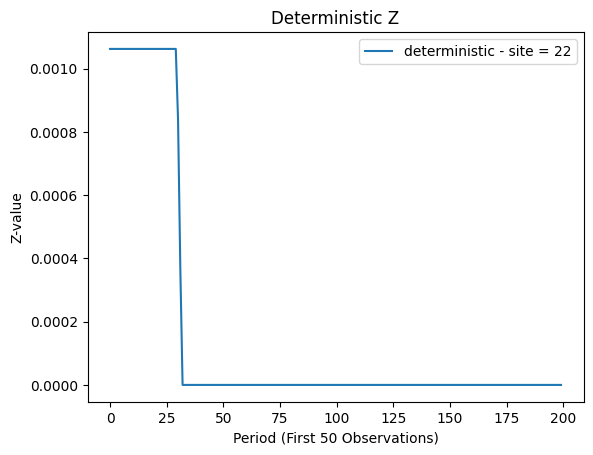

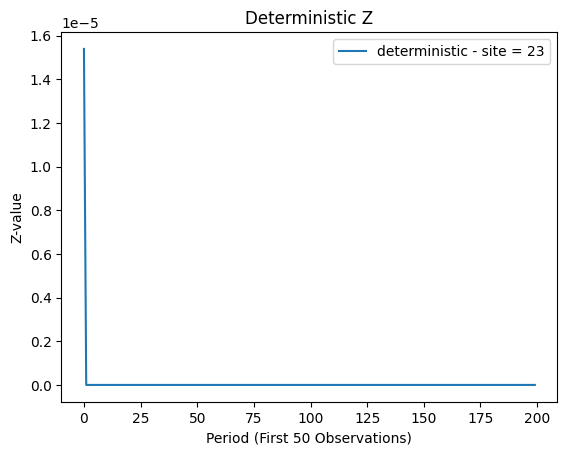

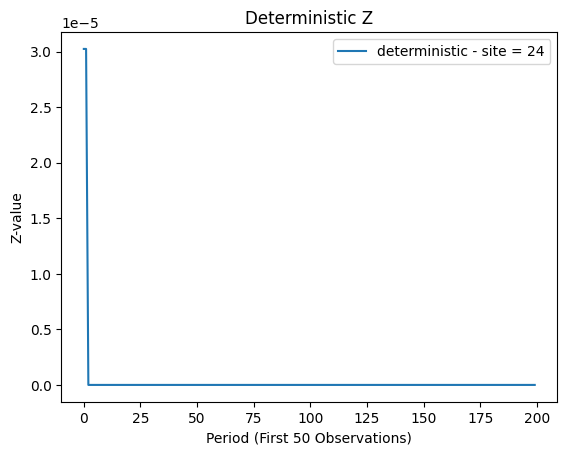

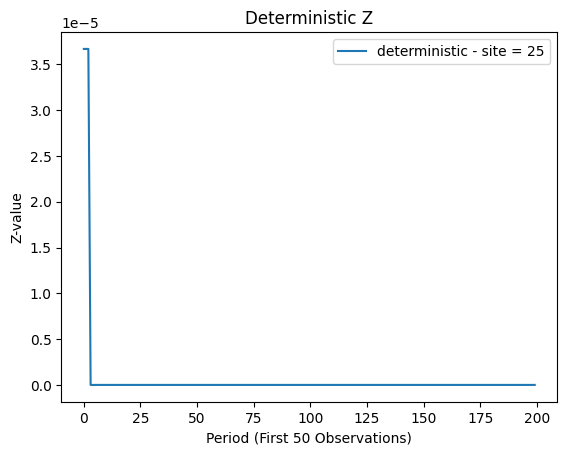

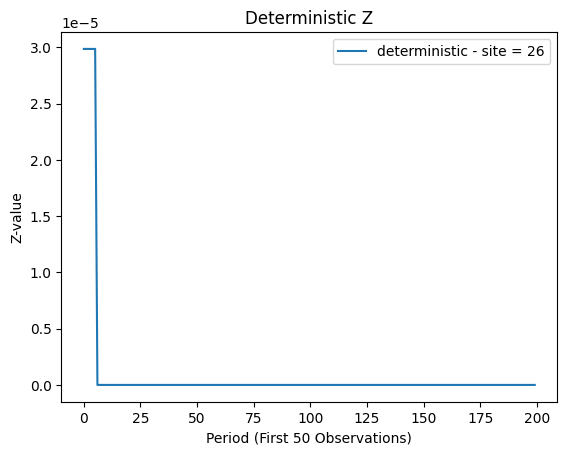

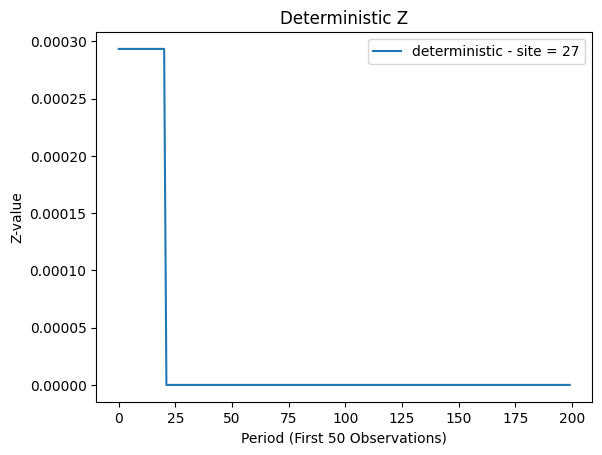

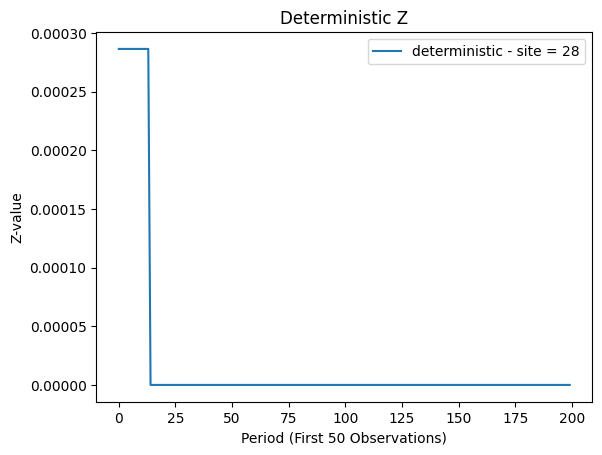

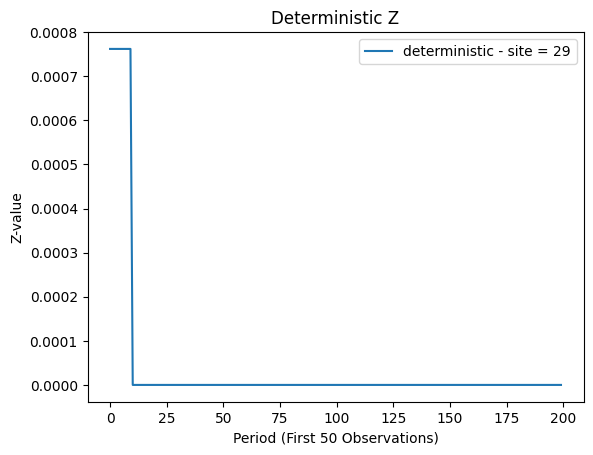

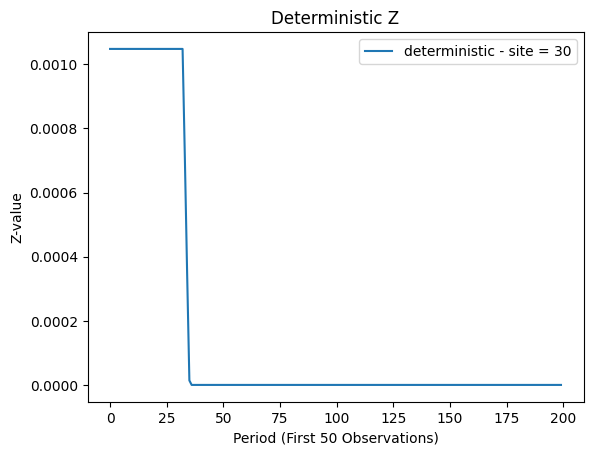

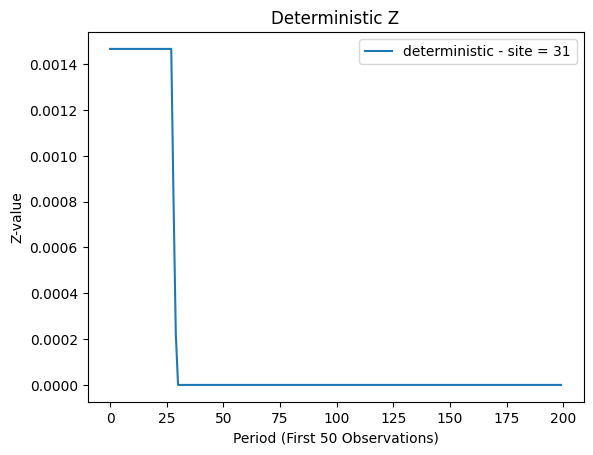

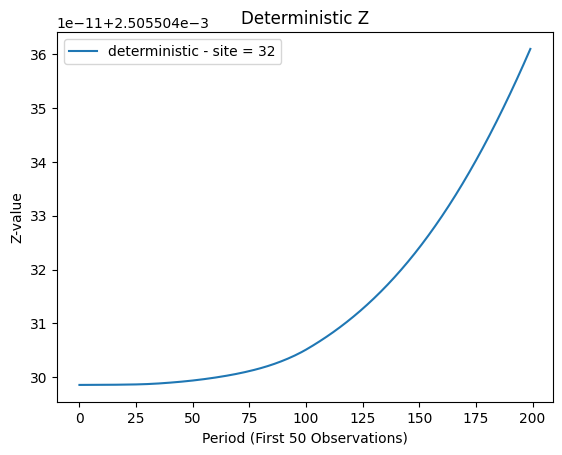

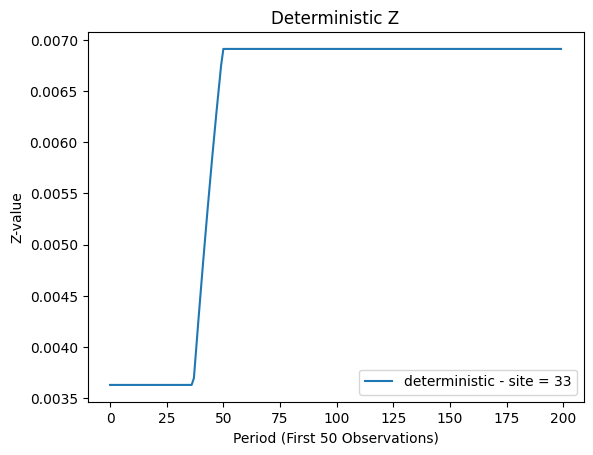

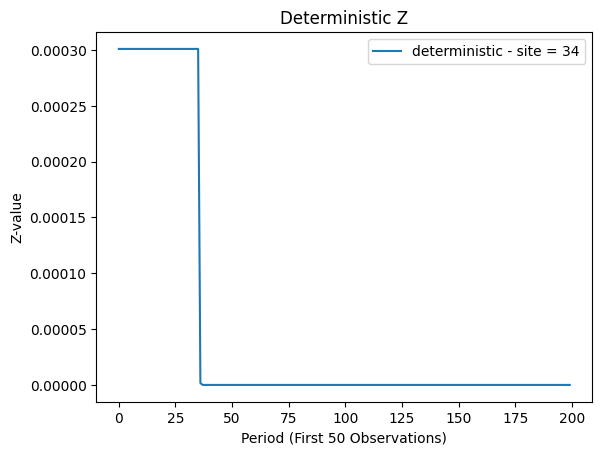

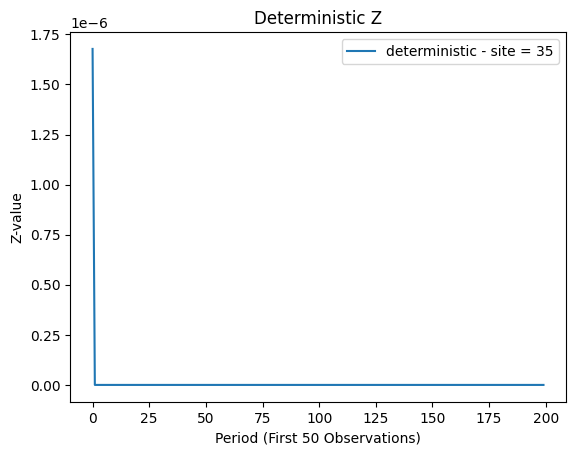

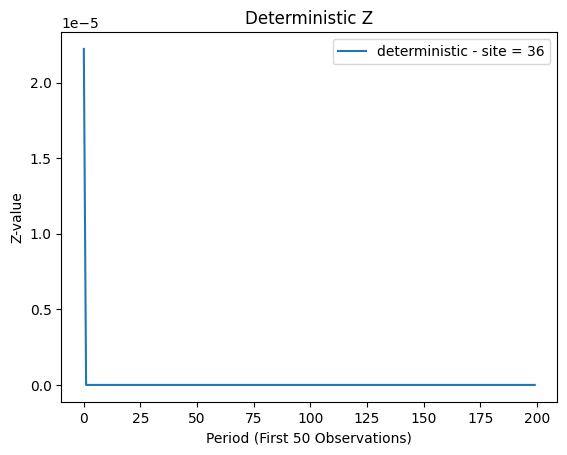

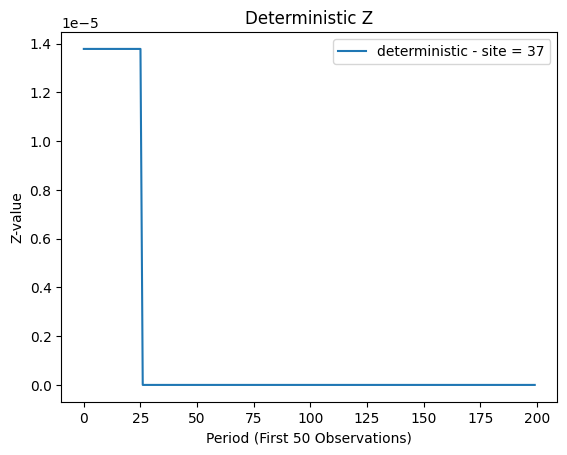

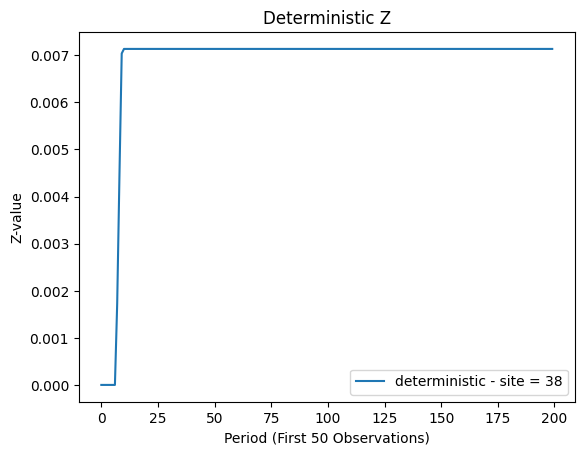

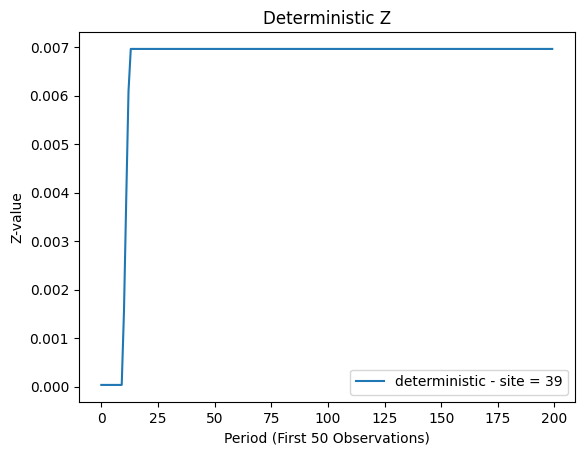

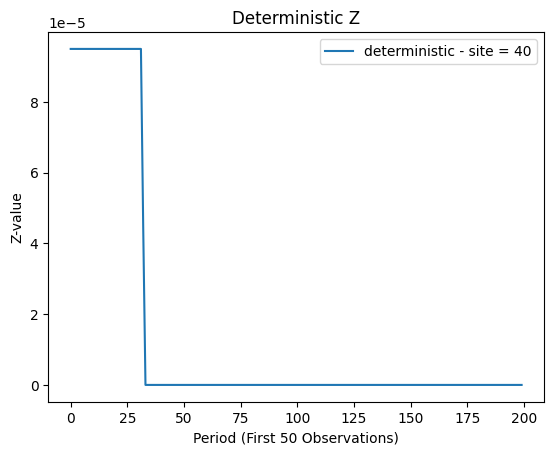

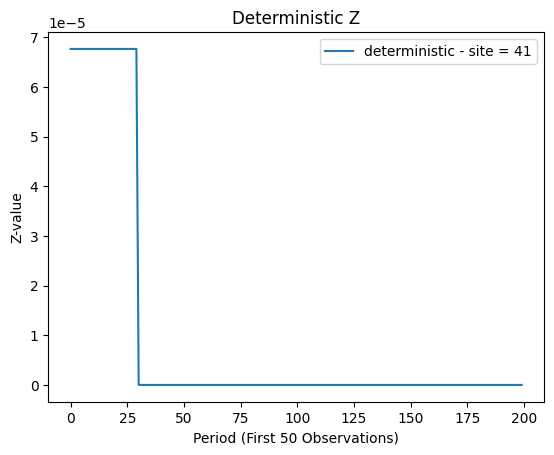

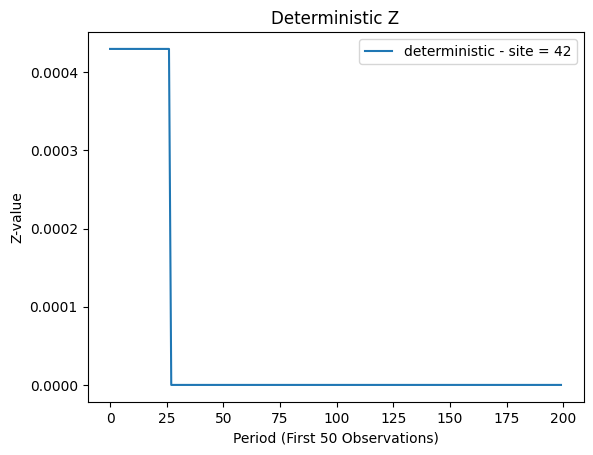

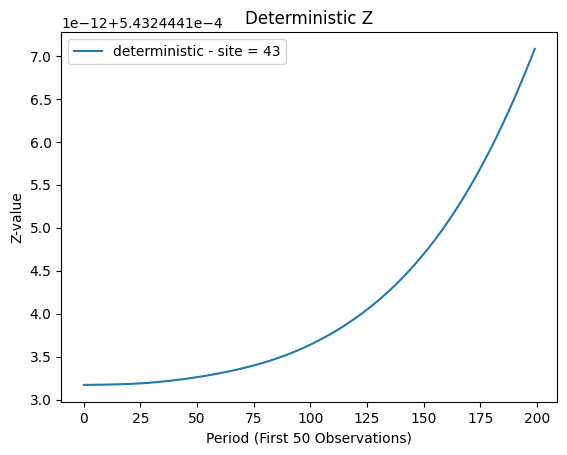

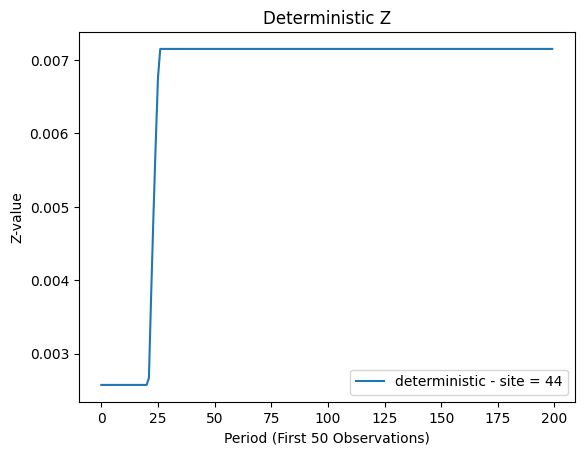

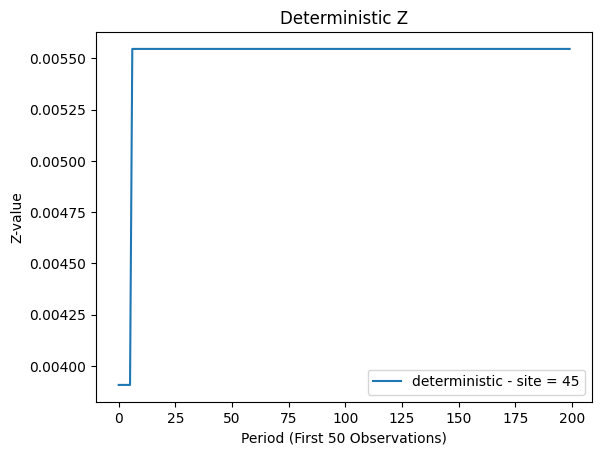

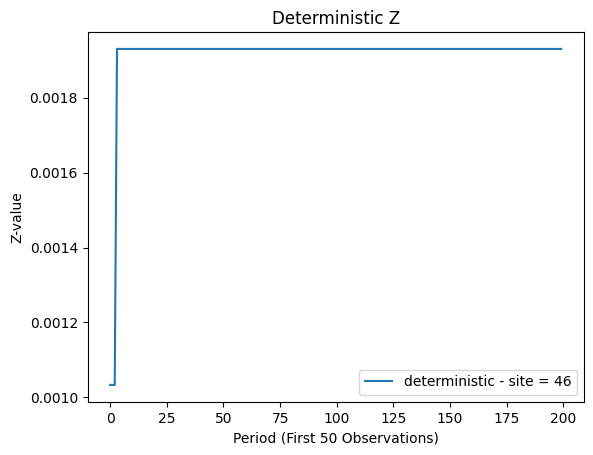

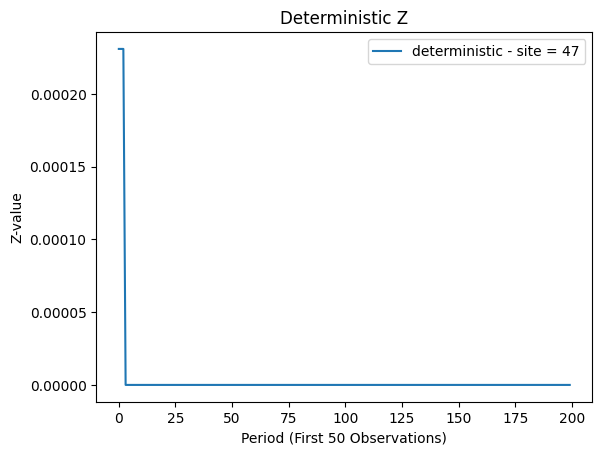

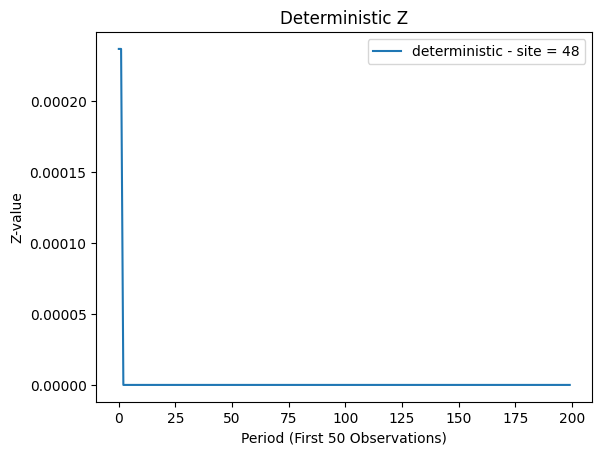

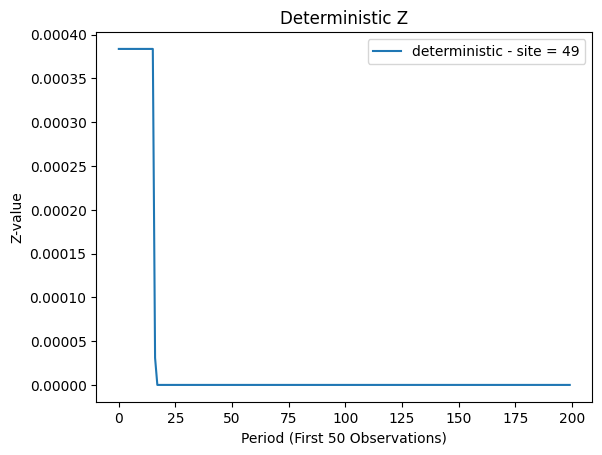

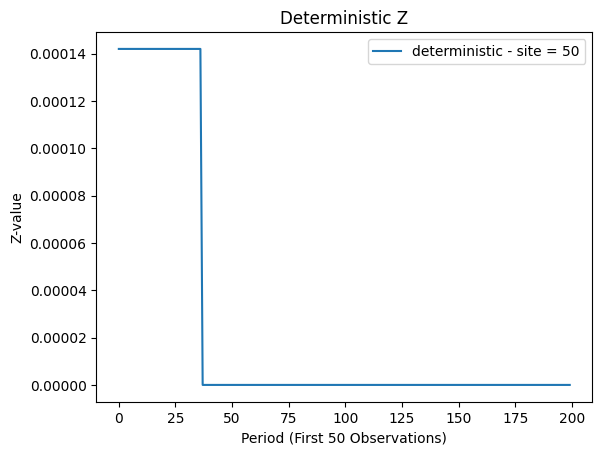

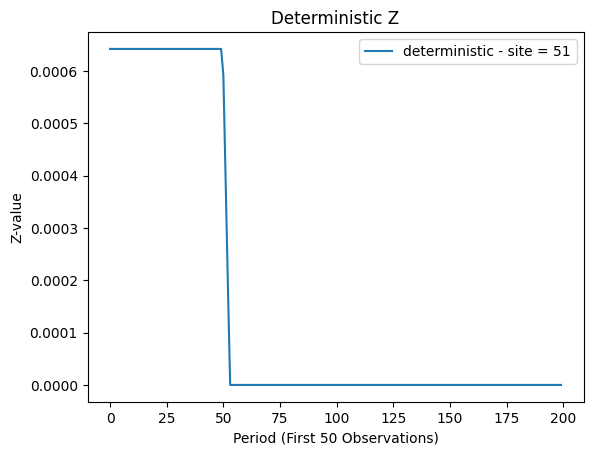

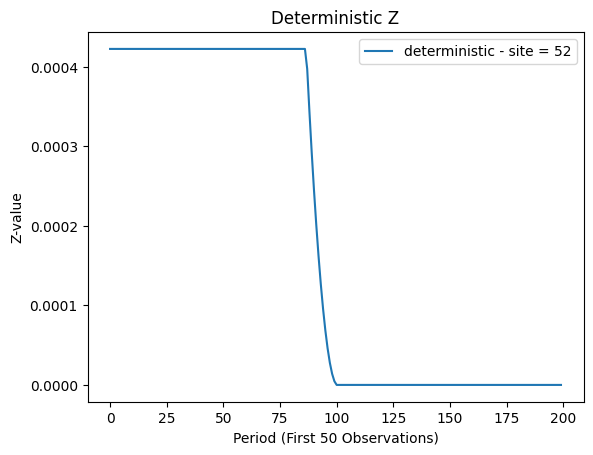

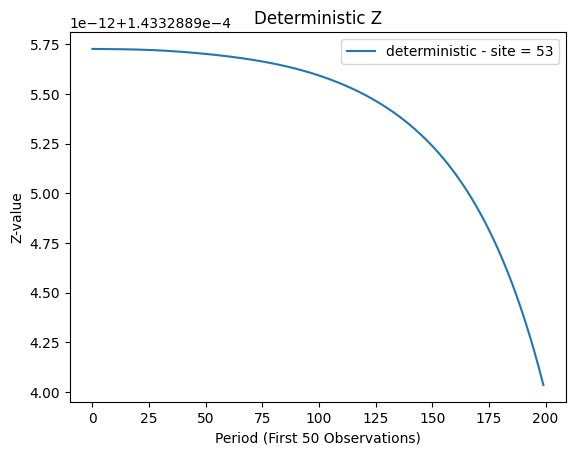

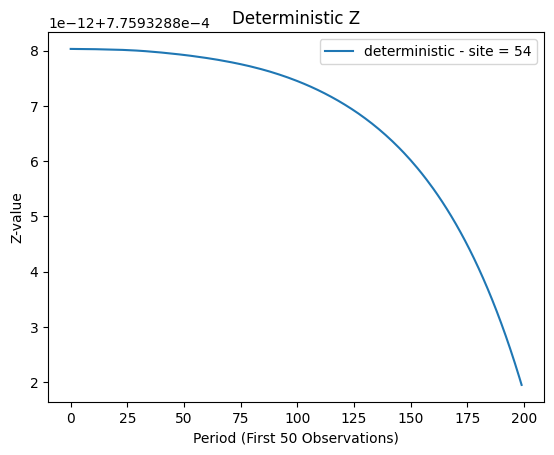

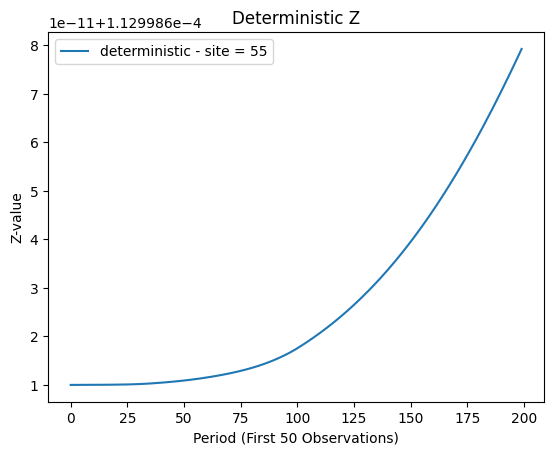

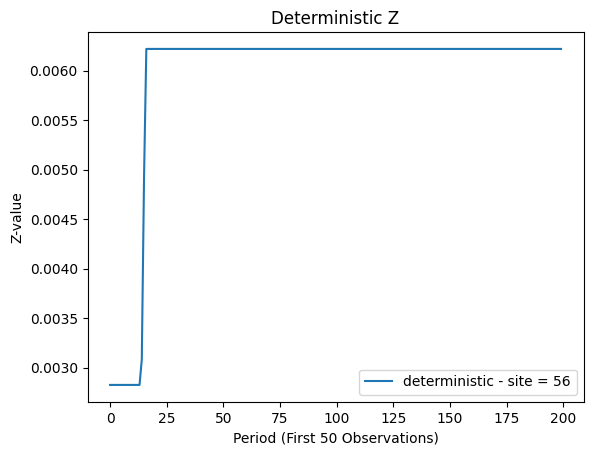

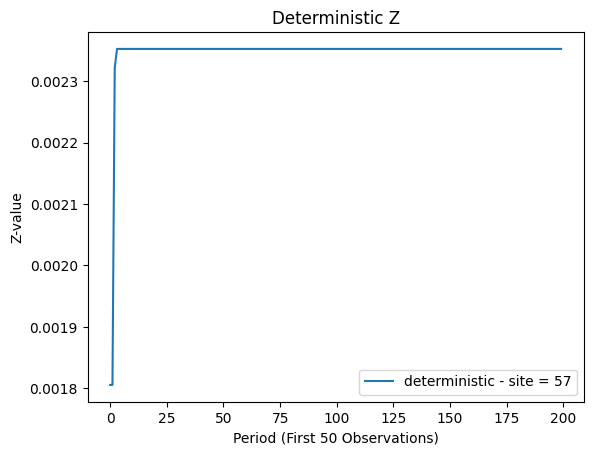

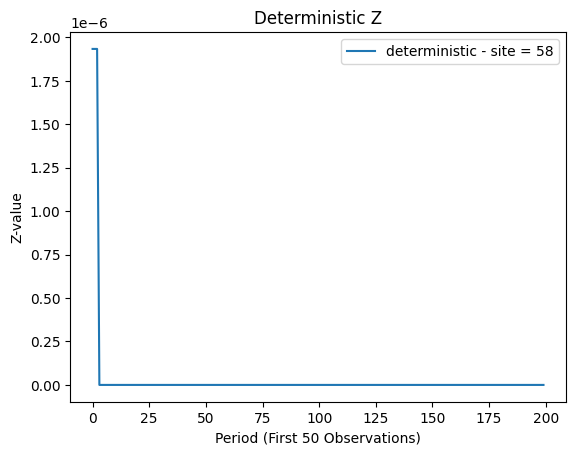

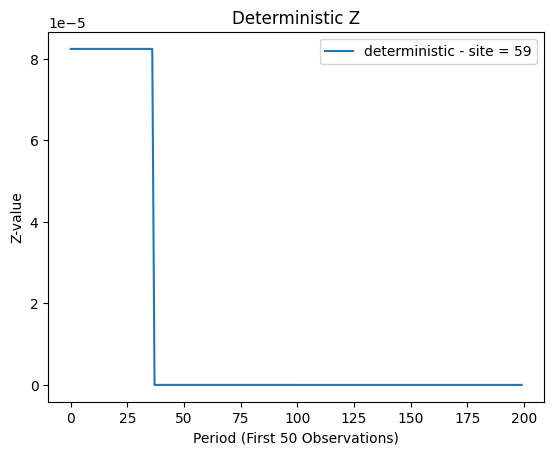

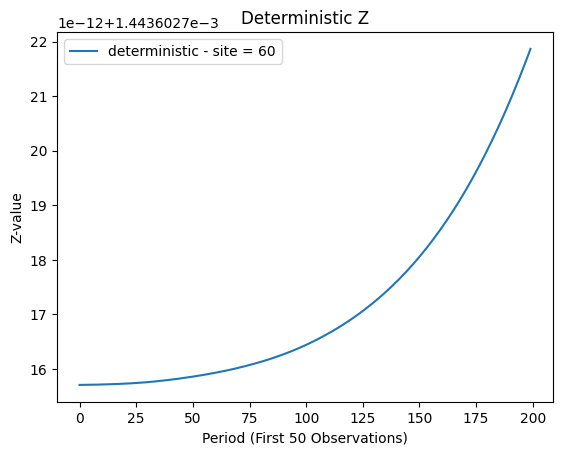

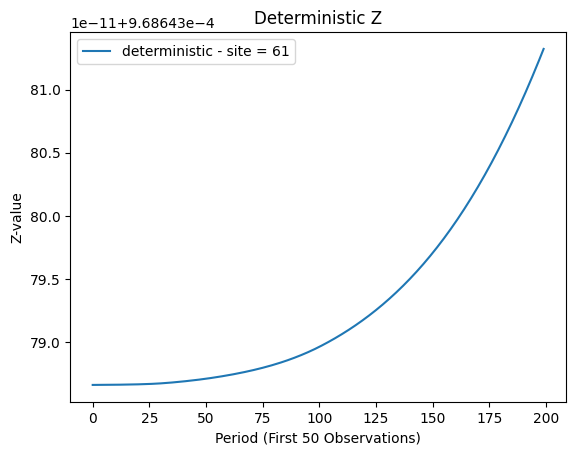

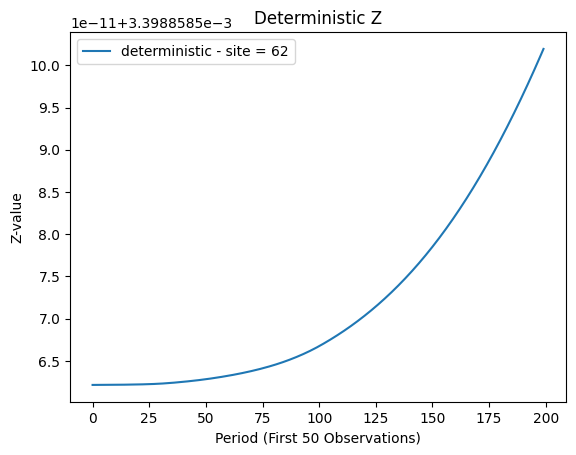

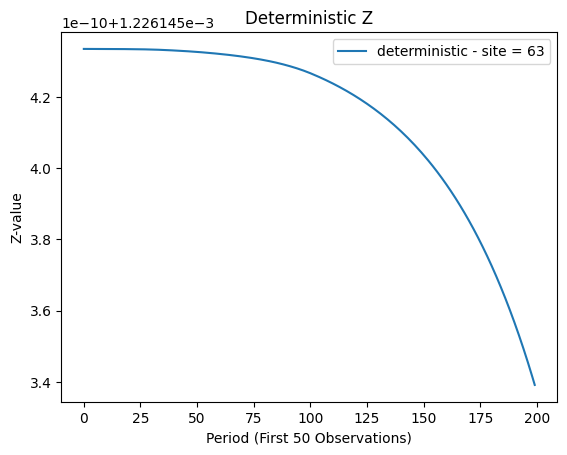

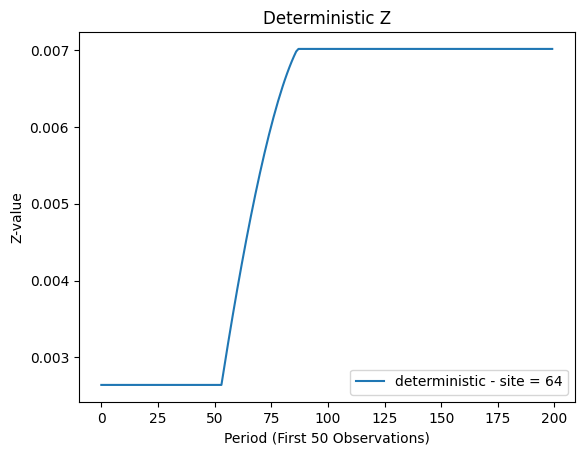

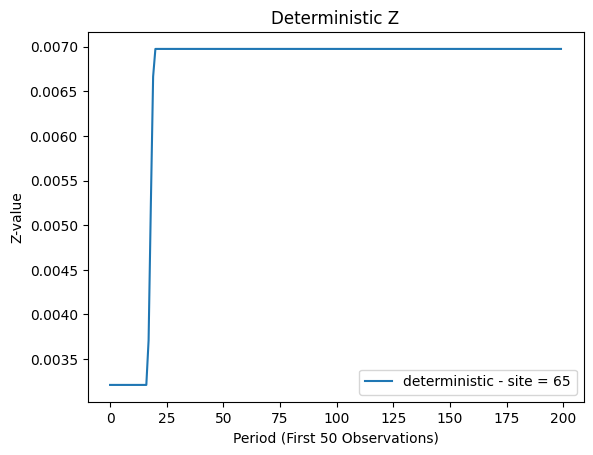

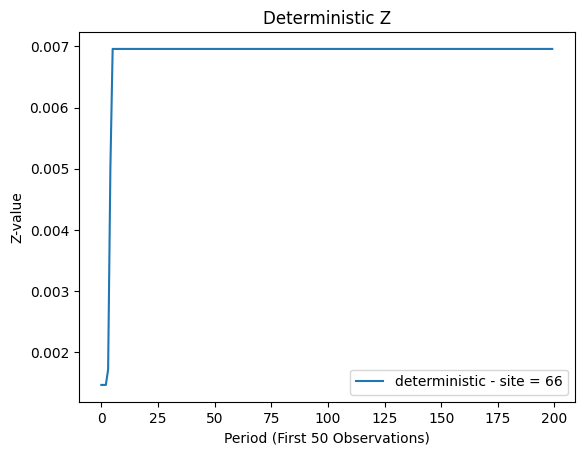

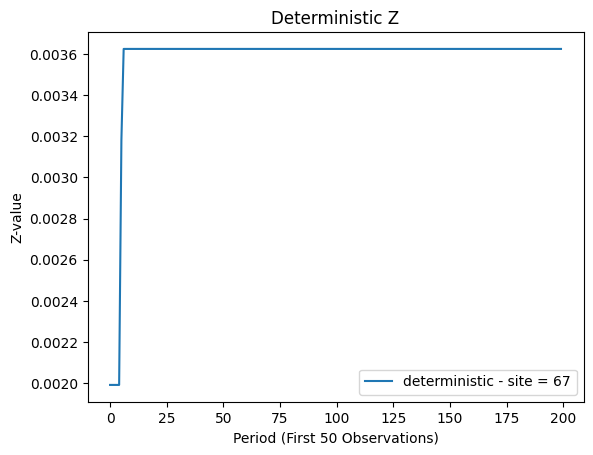

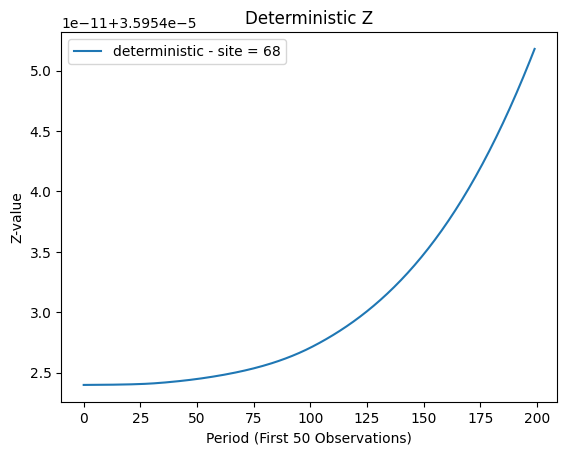

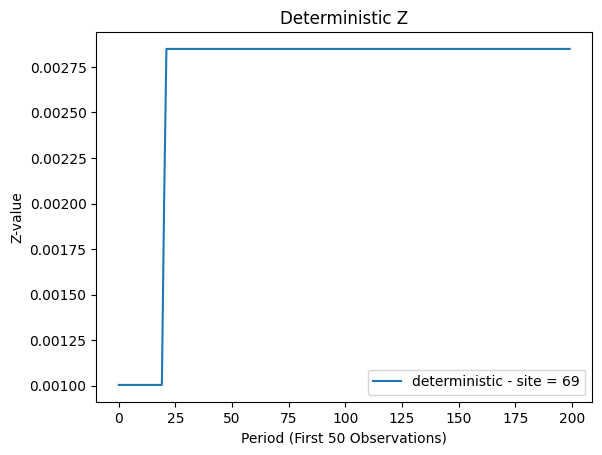

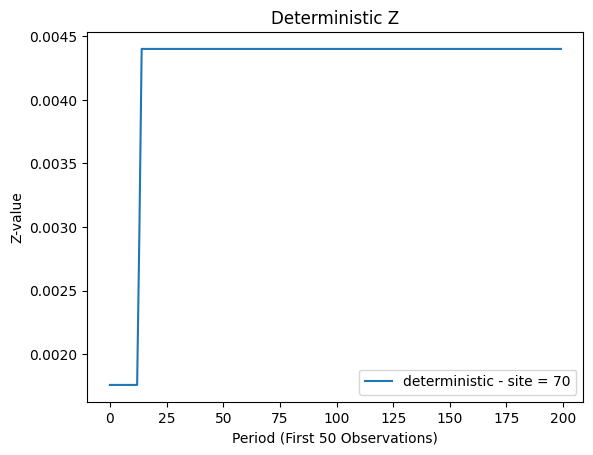

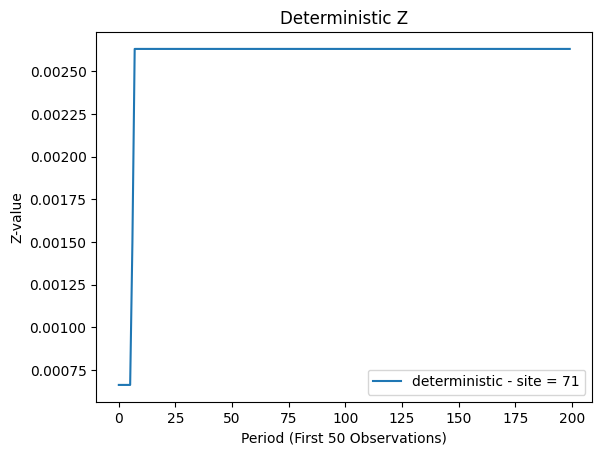

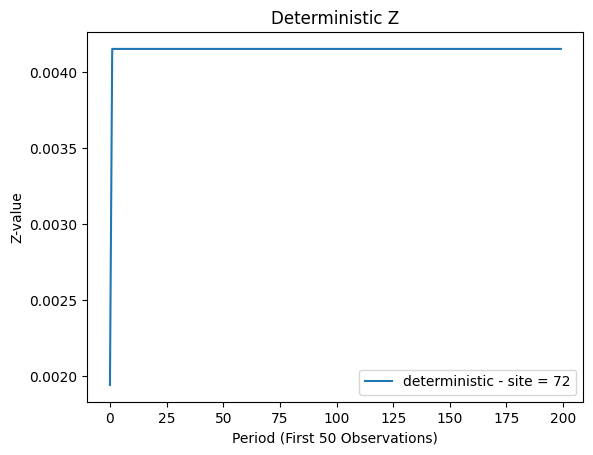

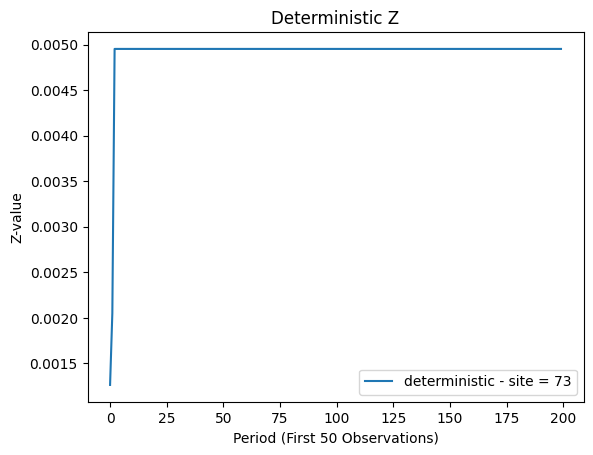

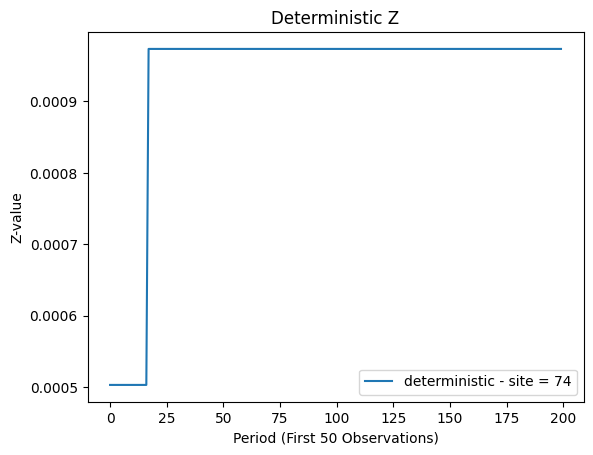

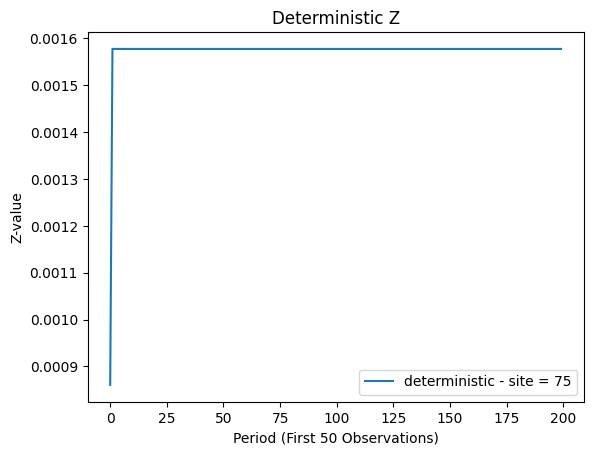

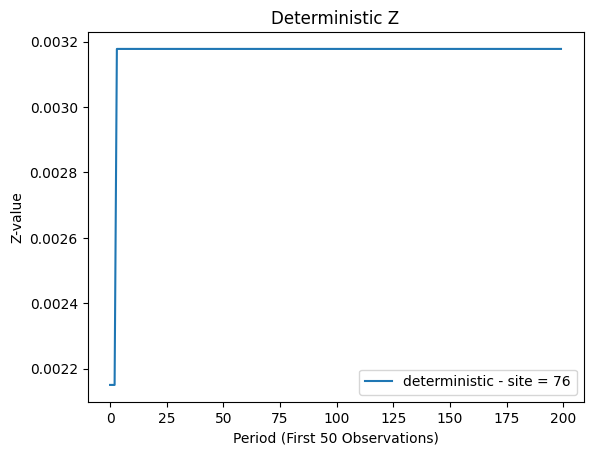

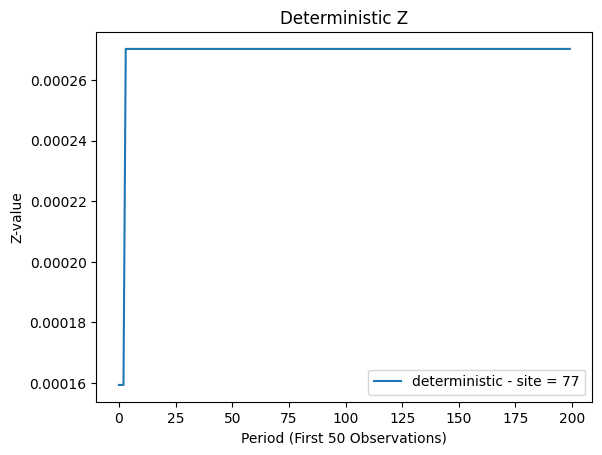

In [5]:
for i in range(num_sites):
    fig, ax = plt.subplots()
    ax.plot(time, sol_val_X[i,:len(time)], label=f'deterministic - site = {i}')
    ax.set_xlabel('Period (First 50 Observations)')
    ax.set_ylabel('Z-value')
    ax.set_title(f'Deterministic Z')
    ax.legend()
    plt.show()

